In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import macti.vis as vis

# Definiendo un plotter

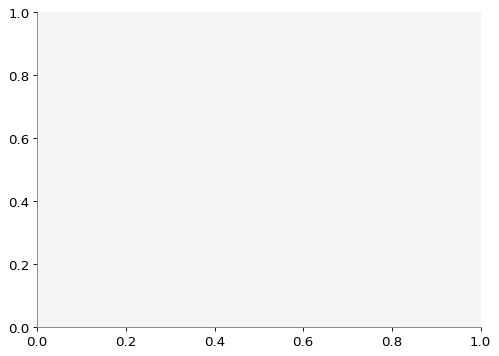

In [3]:
fig = vis.Plotter()

# Graficación de datos y definición del sistema de coordenadas

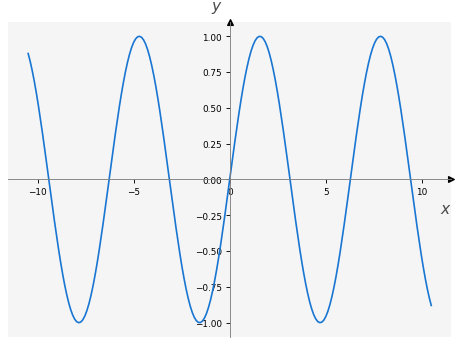

In [4]:
# Se define una sola gráfica
v = vis.Plotter()

# Se configuran los ejes.
v.set_coordsys()

# Algunos datos
x = np.linspace(-10.5, 10.5, 200)

# Graficación de los datos. 
# OJO: se usa como primer parámetro el número de ejes donde
#      se desea graficar los datos, en este caso 1, porque 
#      solo hay una gráfica-
v.plot(1, x, np.sin(x))
v.show()

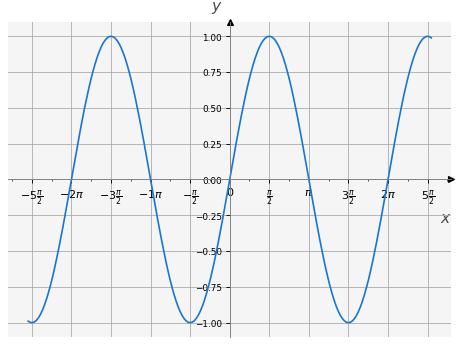

In [5]:
# Se define una sola gráfica
# OJO: Se pueden definir varias gráficas en un Plotter en
#      formato row, col. En este caso es row = 1, col = 1
v = vis.Plotter(1, 1)

# Se configuran los ejes, se usa el número de ejes.
v.set_coordsys(1, xlabelsize=10)

# Algunos datos
x = np.linspace(-8.0, 8.0, 200)

# Graficación de los datos
v.plot(1, x, np.sin(x))

# Se obtienen los ejes
ax = v.axes(1)

# Se definen los ticks en múltiplos de 𝜋.
v.set_ticks(ax, ax.get_xticks(), ax.get_yticks(), PI=True)

v.grid()
v.show()

# Graficación de vectores en 2D

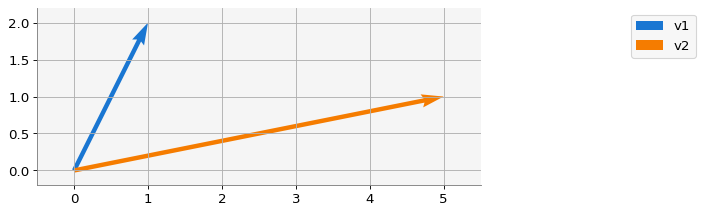

In [6]:
# Definimos dos vectores
v1 = np.array([1,2])
v2 = np.array([5,1])

v = vis.Plotter()

# Graficamos los vectores
v.plot_vectors(1,            # Ejes donde se hace la gráfica
               [v1, v2],     # Lista de vectores
               ['v1', 'v2']) # Lista de etiquetas para los vectores
v.grid()
v.show()

[1 2] [2 4]


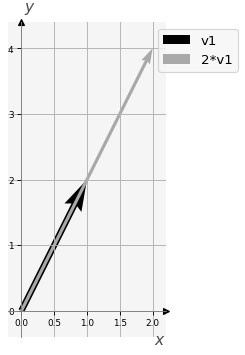

In [7]:
print(v1, 2*v1)

# Definimos el plotter
v = vis.Plotter()

# Configuralos los ejes
v.set_coordsys(1)

# Graficamos los vectores, con colores diferentes.
v.plot_vectors(1,                     # Ejes donde se hace la gráfica
               [v1, 2*v1],            # Lista de vectores
               ['v1', '2*v1'],        # Lista de etiquetas para los vectores
               ['black', 'darkgray'], # Lista de colores para los vectores
               w=[0.04, 0.02])        # Lista de los anchos de cada vector
v.grid()
v.show()

# Suma de vectores en 2D

[1 2] [5 1] [6 3]


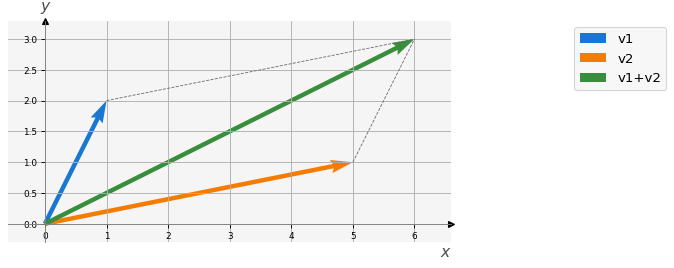

In [8]:
print(v1, v2, v1+v2)
v = vis.Plotter()
v.set_coordsys(1)

# La función plot_vectors_sum() grafica dos vectores y su suma.
v.plot_vectors_sum(1,            # Ejes donde se hace la gráfica
                   [v1, v2],     # Lista de vectores
                   ['v1', 'v2']) # Lista de etiquetas para los vectores
v.grid()
v.show()

# Varias gráficas en una figura

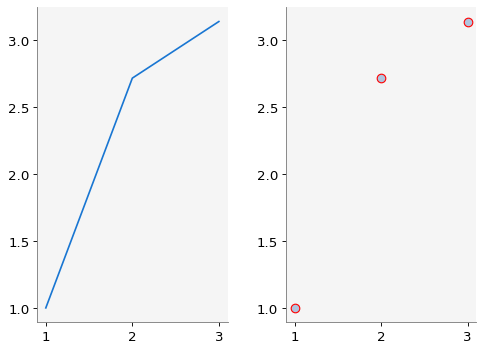

In [9]:
x = np.array([1,2,3])
y = np.array([1,2.718281828459045,3.141592653589793])

v = vis.Plotter(1,2)

# Las funciones de graficación son un subconjunto de las de matplotlib
# Se usan los mismos parámetros de las funciones de matplotlib, 

# Gráfica 1.
v.plot(1, x, y) 

# Gráfica 2.
v.scatter(2, x, y, fc = 'lightsteelblue', ec = 'red', s=60)

v.show()

# Varias gráficas con diferenes opciones.

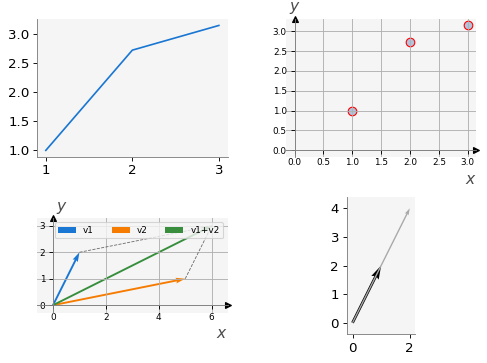

In [10]:
v = vis.Plotter(2,2)

# Gráfica 1.
v.plot(1, x, y) 

# Gráfica 2.
v.set_coordsys(2)
v.scatter(2, x, y, fc = 'lightsteelblue', ec = 'red', s=60)

# Gráfica 3.
v.set_coordsys(3)
v.plot_vectors_sum(3, [v1, v2], ['v1', 'v2'])

# Gráfica 4.
v.plot_vectors(4, [v1, 2*v1], lcolors=['black', 'darkgray'], w=[0.04, 0.02])

# Rejilla y leyenda para algunas gráficas
v.grid([2, 3])
v.legend([3], ncol=3, fontsize=8, loc="upper right")

v.show()

# Parámetros de la figura y de los ejes de cada subgráfica

Los parámetros para la figura y los ejes de cada subgráfica se deben pasar como diccionarios. Existen al menos dos opciones:

1. Definiendo un diccionario como se hace normalmente en Python:
```python
d1 = {'par1':'val1', 'par2':'val2', ...}
```

2. Usando la función `dict()` para crear un diccionario: 
```python
d1 = dict(par1 = 'val1', par2 = 'val2', ...)
```
Una dez definido el diccionario, se puede usar, por ejemplo, como sigue:

```python
v = vis.Plotter(1, 2, d1)
```


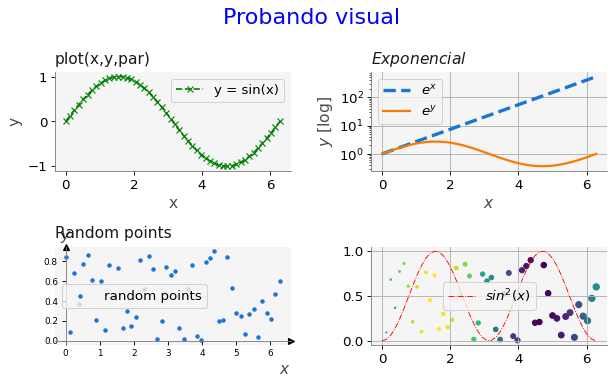

In [11]:
# Parámetros para la figura
fig_par ={'figsize':(8,5)}

# Parámetros para las subgráficas (lista de diccionarios)
ejes_par = [
    # Subgráfica 1
    {'title':'plot(x,y,par)', 'xlabel':'x', 'ylabel':'y'},
    # Sibgráfica 2
    {'title':'$Exponencial$', 'yscale':'log', 'xlabel':'$x$', 'ylabel':'$y$ [log]'},
    # Subgráfica 3
    dict(title='Random points', xlabel='n')]

# Parámetros para el título
titulo_par = dict(color='blue', fontsize=20)

# Se define un arreglo de (2 x 2) subgráficas
v = vis.Plotter(2, 2, ejes_par, fig_par, titulo_par, "Probando visual")

# Algunos datos para graficar
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)
r = 0.9 * np.random.rand(len(x))

# Primera subgráfica
v.plot(1, x, y, marker = 'x', color='green', ls='--', label='y = sin(x)')

# Segunda subgráfica
v.plot(2, x, np.exp(x), ls='--', lw=3.0, label='$e^x$')
v.plot(2, x, np.exp(y), lw=2.0, label = '$e^y$')

# Tercera subgráfica
v.set_coordsys(3)
v.scatter(3, x, r, marker='.', label='random points')

# Cuarta subgráfica
v.scatter(4, x, r, s = x*5, c = y)
v.plot(4, x, y*y, color = 'r', ls = '-.', lw = 0.80, label = '$sin^2(x)$')

# Acciones sobre subconjuntos de subgráficas
v.grid([2,4]) # se activa la rejilla en las subgráficas 2 y 4
v.legend(frameon=True) # se activan las leyendas en todas las subgráficas

v.show() # similar a plt.show()

# Elementos útiles para Modelación Computacional

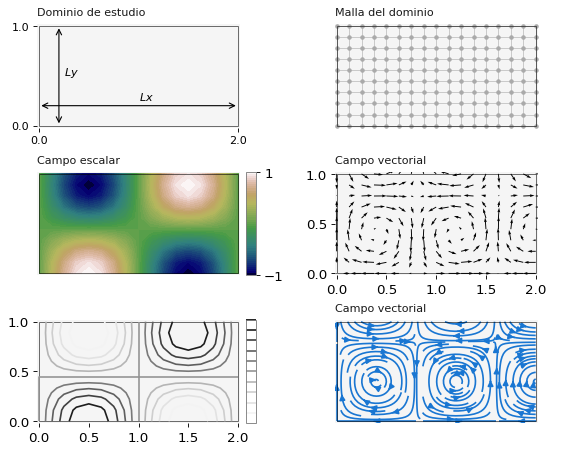

In [12]:
# Tamaño del dominio
Lx = 2.0
Ly = 1.0

# Número de nodos en cada eje
Nx = 15
Ny = 8

# Tamaño de la malla en cada dirección
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)

#print('hx = {}, hy = {}'.format(hx, hy))

# Número total de nodos incluyendo las fronteras
NxT = Nx + 2
NyT = Ny + 2

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)
xg, yg = np.meshgrid(xn, yn, indexing='ij')

# Definición de un campo escalar en cada punto de la malla
T = np.zeros((NxT, NyT))

# Asignamos un valor a cada entrada del arreglo
for i in range(NxT):
    for j in range(NyT):
        T[i,j] = np.sin(np.pi*i/8) * np.cos(np.pi*j/8)

A = 1.0
alpha = 1.25
U = -A * np.cos(np.pi * alpha * yg) * np.sin(np.pi * alpha * xg)
V =  A * np.sin(np.pi * alpha * yg) * np.cos(np.pi * alpha * xg)

# Diccionario para los parámetros de los ejes
a_p = dict(aspect = 'equal')

# Lista de diccionarios para definir los parámetros 
# de los ejes de todas las gáficas
axis_par = [a_p for i in range(0,6)]

# Definimos el Plotter con los parámetros correspondientes.
v = vis.Plotter(3,2, axis_par, dict(figsize=(8,6)))

# Gráfica 1.
v.set_canvas(1, Lx, Ly)  # Se configura el canvas
v.draw_domain(1, xg, yg) # Se dibuja el dominio
v.axes(1).set_title('Dominio de estudio', fontsize=10)

# Gráfica 2.
v.set_canvas(2, Lx, Ly)
v.plot_mesh2D(2, xg, yg, nodeson = True) # Se dibuja la malla
v.plot_frame(2, xg, yg, ticks=False)     # Se dibuja el recuadro del dominio
v.axes(2).set_title('Malla del dominio', fontsize=10)

# Grafica 3. 
cax = v.set_canvas(3, Lx, Ly)
# Se dibujan contornos y una barra de color
c = v.contourf(3, xg, yg, T, ticks = False, levels = 50, cmap = 'gist_earth')
v.fig.colorbar(c, cax=cax, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
v.plot_frame(3, xg, yg, ticks=False) # Se dibuja el recuadro del dominio
v.axes(3).set_title('Campo escalar', fontsize=10)

# Grafica 4. 
v.set_canvas(4, Lx, Ly)
v.quiver(4, xg, yg, U, V, ticks = True)
v.plot_frame(4, xg, yg, ticks=False)
v.axes(4).set_title('Campo vectorial', fontsize=10)

# Gráfica 5.
cax = v.set_canvas(5, Lx, Ly)
v.plot_frame(5, xg, yg, ticks=False)
c = v.contour(5, xg, yg, T, ticks = True, levels = 10, cmap = 'Greys')
v.fig.colorbar(c, cax=cax, ticks = [], shrink=0.5, orientation='vertical')
v.axes(3).set_title('Campo escalar', fontsize=10)

# Gráfica 6.
v.set_canvas(6, Lx, Ly)
v.streamplot(6, xg, yg, U, V, ticks = False)
v.plot_frame(6, xg, yg, ticks=False)
v.axes(6).set_title('Campo vectorial', fontsize=10)

v.fig.tight_layout(h_pad=0.5, w_pad=2.0)
v.show()

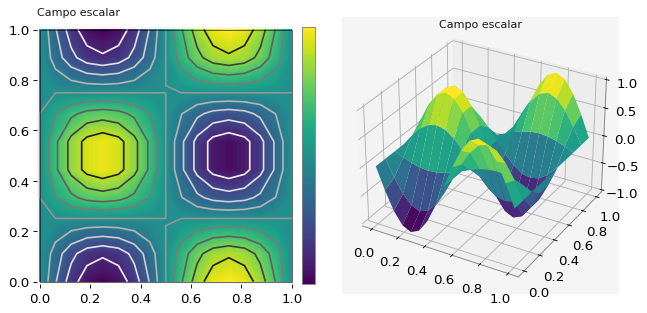

In [13]:
# Tamaño del dominio
Lx = 1.0
Ly = 1.0

# Número de nodos en cada eje
Nx = 15
Ny = 8

# Tamaño de la malla en cada dirección
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)

#print('hx = {}, hy = {}'.format(hx, hy))

# Número total de nodos incluyendo las fronteras
NxT = Nx + 2
NyT = Ny + 2

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)
xg, yg = np.meshgrid(xn, yn, indexing='ij')

# Definición de un campo escalar en cada punto de la malla
T = np.zeros((NxT, NyT))

# Asignamos un valor a cada entrada del arreglo
for i in range(NxT):
    for j in range(NyT):
        T[i,j] = np.sin(np.pi*i/8) * np.cos(np.pi*j/8)

A = 1.0
alpha = 2.0
U = -A * np.cos(np.pi * alpha * yg) * np.sin(np.pi * alpha * xg)
V =  A * np.sin(np.pi * alpha * yg) * np.cos(np.pi * alpha * xg)

# Lista de dos diccionarios. Cada diccionario define los parámetrosç
# de los ejes correspondientes
axis_par = [dict(aspect = 'equal'),               # Ejes en 2D
            dict(projection='3d', aspect='auto')] # Ejes en 3D

# Definición del Plotter con los parámetros correspondientes.
v = vis.Plotter(1, 2, 
                axis_par,            # Parámetros de los ejes
                dict(figsize=(8,6))) # Parámetros de la figura

# Gráfica 1.
cax = v.set_canvas(1, Lx, Ly)
c = v.contourf(1, xg, yg, U, levels = 100, cmap='viridis')
v.contour(1, xg, yg, U, levels=10, cmap='Greys')
v.fig.colorbar(c, cax=cax, ticks = [], shrink=0.5, orientation='vertical')
v.plot_frame(1, xg, yg, ticks=False)
v.axes(1).set_title('Campo escalar', fontsize=10)

# Gráfica 2.
v.plot_surface(2, xg, yg, U, cmap='viridis')
v.axes(2).set_title('Campo escalar', fontsize=10)

v.fig.tight_layout(h_pad=0.5, w_pad=2.0)
v.show()

# Programando un interactivo.

In [14]:
%run "./interactivo_test.ipynb"

Output()